In [1]:
!pip install -q pyspark

In [2]:
from pyspark.sql import SparkSession
name= "Insurance_Challenge"

spark= SparkSession.builder.appName(name).master("local[*]").getOrCreate()

24/11/21 17:03:00 WARN Utils: Your hostname, MacBook-Pro-de-Jaime.local resolves to a loopback address: 127.0.0.1; using 10.170.18.13 instead (on interface en0)
24/11/21 17:03:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/21 17:03:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [6]:
train="/Users/jaimecastro/Desktop/master/BIG_DATA/kaggle challenge insurance/train.csv"
test= "/Users/jaimecastro/Desktop/master/BIG_DATA/kaggle challenge insurance/test.csv"

train_data= spark.read.format("csv")\
                                .options(header=True, inferschema=True, delimiter=",") \
                                .load(train)

test_data= spark.read.format("csv")\
                                .options(header=True, inferschema=True, delimiter=",") \
                                .load(test)

# Train data 

In [5]:
train_data.toPandas().head()

24/11/21 15:45:40 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,...,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,1
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,1
3,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,0
4,5,A,F,A,A,F,BI,A,AH,AX,...,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489,0


In [6]:
train_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- cat_0: string (nullable = true)
 |-- cat_1: string (nullable = true)
 |-- cat_2: string (nullable = true)
 |-- cat_3: string (nullable = true)
 |-- cat_4: string (nullable = true)
 |-- cat_5: string (nullable = true)
 |-- cat_6: string (nullable = true)
 |-- cat_7: string (nullable = true)
 |-- cat_8: string (nullable = true)
 |-- cat_9: string (nullable = true)
 |-- cat_10: string (nullable = true)
 |-- cat_11: string (nullable = true)
 |-- cat_12: string (nullable = true)
 |-- cat_13: string (nullable = true)
 |-- cat_14: string (nullable = true)
 |-- cat_15: string (nullable = true)
 |-- cat_16: string (nullable = true)
 |-- cat_17: string (nullable = true)
 |-- cat_18: string (nullable = true)
 |-- cont_0: double (nullable = true)
 |-- cont_1: double (nullable = true)
 |-- cont_2: double (nullable = true)
 |-- cont_3: double (nullable = true)
 |-- cont_4: double (nullable = true)
 |-- cont_5: double (nullable = true)
 |-- cont_6: double 

In [7]:
train_data.toPandas().describe()

,id,cont_0,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250200.972163,0.504668,0.494298,0.516665,0.474419,0.504471,0.501874,0.488338,0.502006,0.488016,0.469211,0.508217,0.180000
std,144219.833353,0.206847,0.213004,0.214929,0.216613,0.227354,0.241249,0.211374,0.203526,0.178824,0.194507,0.203393,0.384188
min,0.000000,-0.049562,0.088998,0.098591,-0.045316,0.168071,-0.036379,-0.005648,0.090901,0.013554,0.215540,0.097789,0.000000
25%,125358.750000,0.344650,0.317643,0.325857,0.292342,0.279254,0.276052,0.323747,0.353090,0.358912,0.309861,0.368361,0.000000
50%,250428.000000,0.479535,0.463514,0.471348,0.388602,0.478935,0.554750,0.518136,0.435455,0.410860,0.406286,0.446297,0.000000
75%,375208.500000,0.637575,0.694153,0.704864,0.645064,0.725430,0.735184,0.608938,0.642915,0.612380,0.586620,0.582064,0.000000
max,499999.000000,0.999590,1.011597,1.016600,0.965609,0.860253,0.853022,0.966553,1.035818,1.054257,1.007189,1.008060,1.000000


# Test data

In [7]:
test_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- cat_0: string (nullable = true)
 |-- cat_1: string (nullable = true)
 |-- cat_2: string (nullable = true)
 |-- cat_3: string (nullable = true)
 |-- cat_4: string (nullable = true)
 |-- cat_5: string (nullable = true)
 |-- cat_6: string (nullable = true)
 |-- cat_7: string (nullable = true)
 |-- cat_8: string (nullable = true)
 |-- cat_9: string (nullable = true)
 |-- cat_10: string (nullable = true)
 |-- cat_11: string (nullable = true)
 |-- cat_12: string (nullable = true)
 |-- cat_13: string (nullable = true)
 |-- cat_14: string (nullable = true)
 |-- cat_15: string (nullable = true)
 |-- cat_16: string (nullable = true)
 |-- cat_17: string (nullable = true)
 |-- cat_18: string (nullable = true)
 |-- cont_0: double (nullable = true)
 |-- cont_1: double (nullable = true)
 |-- cont_2: double (nullable = true)
 |-- cont_3: double (nullable = true)
 |-- cont_4: double (nullable = true)
 |-- cont_5: double (nullable = true)
 |-- cont_6: double 

In [9]:
test_data.toPandas().describe()

,id,cont_0,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250200.972163,0.504668,0.494298,0.516665,0.474419,0.504471,0.501874,0.488338,0.502006,0.488016,0.469211,0.508217,0.180000
std,144219.833353,0.206847,0.213004,0.214929,0.216613,0.227354,0.241249,0.211374,0.203526,0.178824,0.194507,0.203393,0.384188
min,0.000000,-0.049562,0.088998,0.098591,-0.045316,0.168071,-0.036379,-0.005648,0.090901,0.013554,0.215540,0.097789,0.000000
25%,125358.750000,0.344650,0.317643,0.325857,0.292342,0.279254,0.276052,0.323747,0.353090,0.358912,0.309861,0.368361,0.000000
50%,250428.000000,0.479535,0.463514,0.471348,0.388602,0.478935,0.554750,0.518136,0.435455,0.410860,0.406286,0.446297,0.000000
75%,375208.500000,0.637575,0.694153,0.704864,0.645064,0.725430,0.735184,0.608938,0.642915,0.612380,0.586620,0.582064,0.000000
max,499999.000000,0.999590,1.011597,1.016600,0.965609,0.860253,0.853022,0.966553,1.035818,1.054257,1.007189,1.008060,1.000000


# EDA

Missing values

In [10]:
from pyspark.sql import functions as F

missing_values = train_data.select(
        [(F.count(F.when(F.col(c).isNull(), c)) + F.count(F.when(F.isnan(c), c))).alias(c) for c in train_data.columns]
    )

missing_values.show()


+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+
| id|cat_0|cat_1|cat_2|cat_3|cat_4|cat_5|cat_6|cat_7|cat_8|cat_9|cat_10|cat_11|cat_12|cat_13|cat_14|cat_15|cat_16|cat_17|cat_18|cont_0|cont_1|cont_2|cont_3|cont_4|cont_5|cont_6|cont_7|cont_8|cont_9|cont_10|target|
+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+
|  0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|      0|     0|
+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+--

Categorical columns values

In [11]:
for column in train_data.columns:
        distinct_count = train_data.select(column).distinct().count()
        print(f"Column: {column}, Unique Values: {distinct_count}")

Column: id, Unique Values: 300000


Column: cat_0, Unique Values: 2
Column: cat_1, Unique Values: 15


Column: cat_2, Unique Values: 19


Column: cat_3, Unique Values: 13


Column: cat_4, Unique Values: 20
Column: cat_5, Unique Values: 84
Column: cat_6, Unique Values: 16
Column: cat_7, Unique Values: 51
Column: cat_8, Unique Values: 61
Column: cat_9, Unique Values: 19


Column: cat_10, Unique Values: 297


Column: cat_11, Unique Values: 2
Column: cat_12, Unique Values: 2
Column: cat_13, Unique Values: 2
Column: cat_14, Unique Values: 2
Column: cat_15, Unique Values: 4
Column: cat_16, Unique Values: 4
Column: cat_17, Unique Values: 4
Column: cat_18, Unique Values: 4


Column: cont_0, Unique Values: 299854


Column: cont_1, Unique Values: 299874


Column: cont_2, Unique Values: 299874


Column: cont_3, Unique Values: 299805


Column: cont_4, Unique Values: 299872


Column: cont_5, Unique Values: 299781


Column: cont_6, Unique Values: 299802


Column: cont_7, Unique Values: 299895


Column: cont_8, Unique Values: 299859


Column: cont_9, Unique Values: 299846
Column: cont_10, Unique Values: 299817
Column: target, Unique Values: 2


Numeric columns outliers

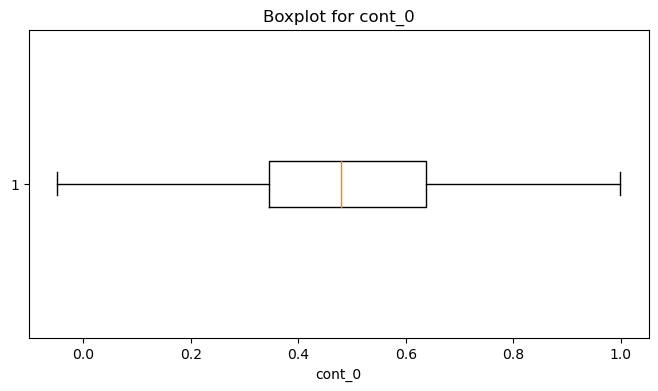

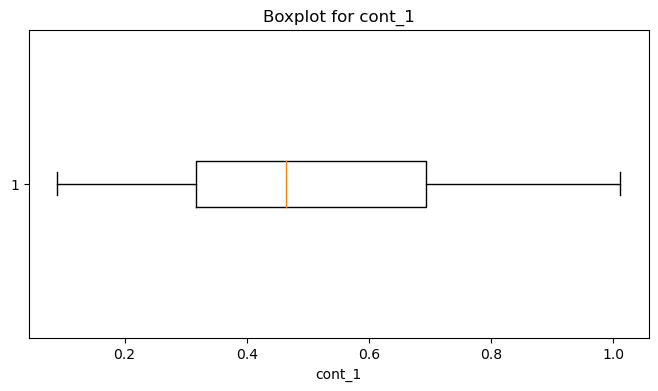

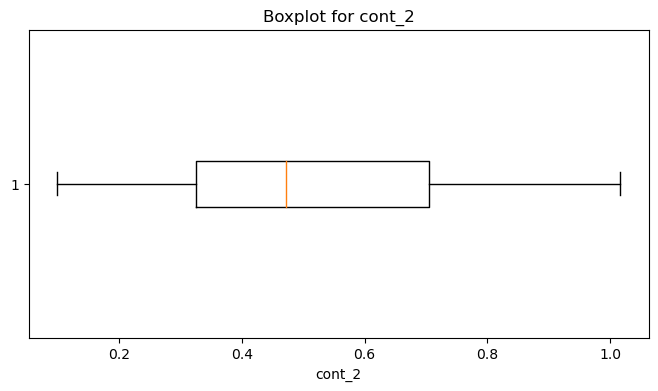

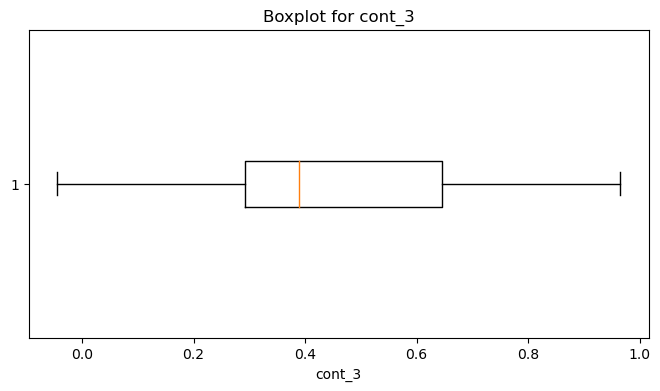

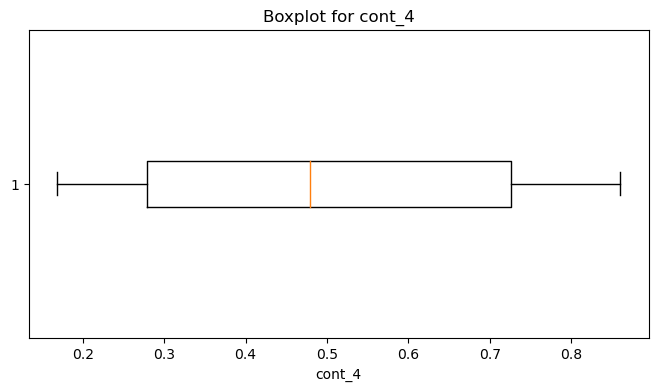

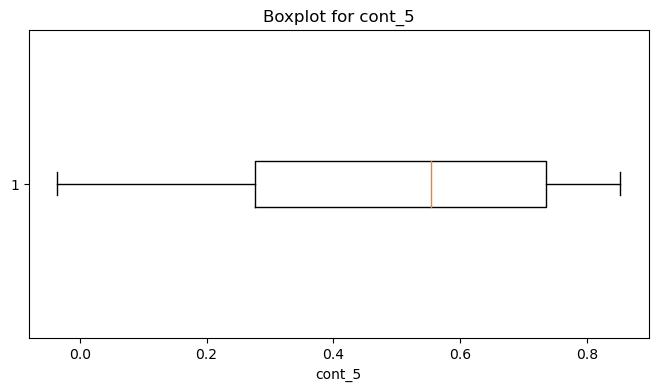

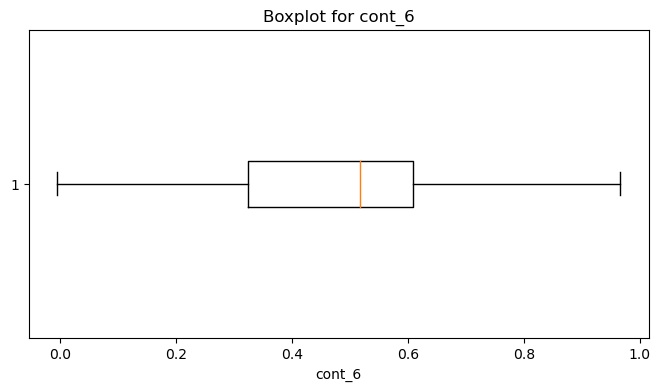

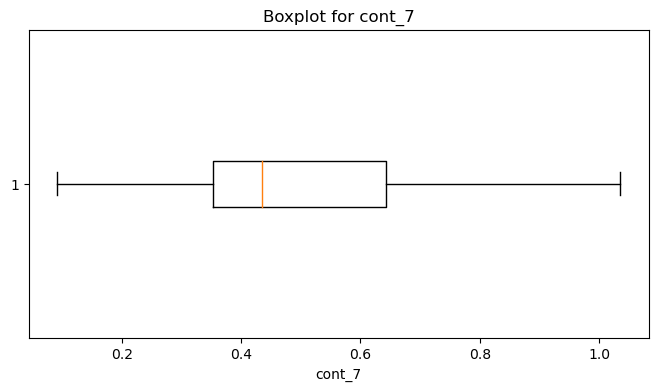

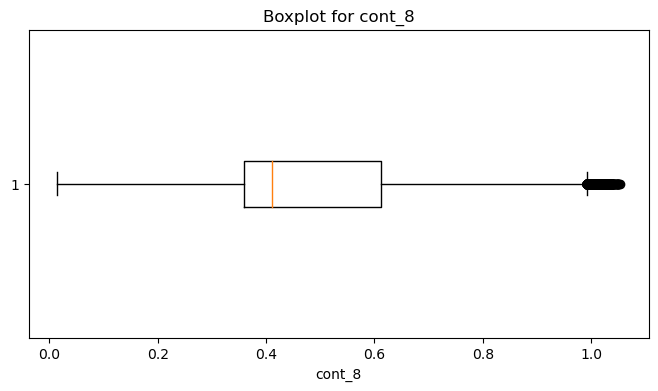

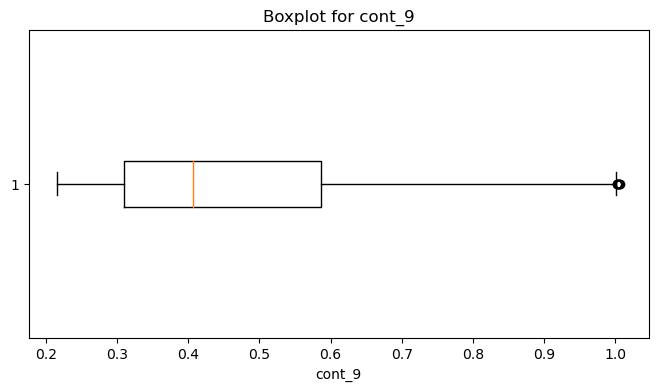

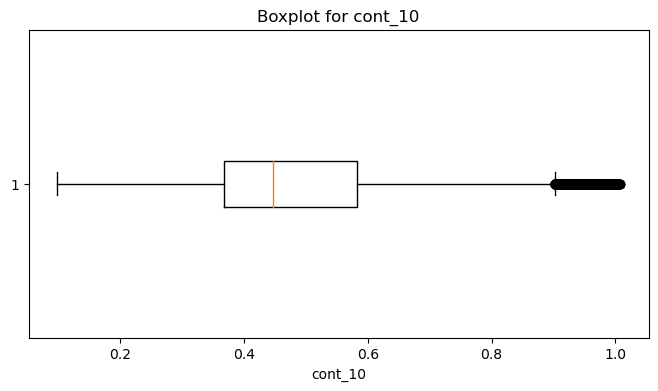

In [8]:
import matplotlib.pyplot as plt

#Split the dataset columns based on their datatype for the preprocessing. I use a for loop that iterates over the
#columns in train_data.dtypes, and separates them into string or double. I skip the target(int)
categorical_columns=[]
continuous_columns=[]

for col, dtype in train_data.dtypes:
    if dtype=="string":
        categorical_columns.append(col)
    elif dtype=="double":
        continuous_columns.append(col)
    else:
        continue


# Convert the continuous columns to a Pandas DataFrame
pandas_df = train_data.select(continuous_columns).toPandas()

# Generate boxplots for each continuous column
for column in continuous_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    plt.boxplot(pandas_df[column].dropna(), vert=False)  # Drop NaN values and create boxplot
    plt.title(f"Boxplot for {column}")  # Add title
    plt.xlabel(column)  # Add x-axis label
    plt.show()  # Display the plot



# Data preprocessing

Vector assembler and string indexer

In [13]:
from pyspark.ml.feature import OneHotEncoder, VectorAssembler

encoder=OneHotEncoder()
print (encoder.extractParamMap())

{Param(parent='OneHotEncoder_8f7198f1c3fc', name='outputCol', doc='output column name.'): 'OneHotEncoder_8f7198f1c3fc__output', Param(parent='OneHotEncoder_8f7198f1c3fc', name='handleInvalid', doc="How to handle invalid data during transform(). Options are 'keep' (invalid data presented as an extra categorical feature) or error (throw an error). Note that this Param is only used during transform; during fitting, invalid data will result in an error."): 'error', Param(parent='OneHotEncoder_8f7198f1c3fc', name='dropLast', doc='whether to drop the last category'): True}


In [9]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

#Split the dataset columns based on their datatype for the preprocessing. I use a for loop that iterates over the
#columns in train_data.dtypes, and separates them into string or double. I skip the target(int)

# Step 1: StringIndexer for categorical columns
indexer = [
    StringIndexer(inputCol=col, outputCol=f"{col}_indexed", handleInvalid="keep")
    for col in categorical_columns
]

# Step 2: OneHotEncoder for indexing the columns
encoder = [
    OneHotEncoder(inputCol=f"{col}_indexed", outputCol=f"{col}_encoded", dropLast=True)
    for col in categorical_columns
]
encoded_columns= [f"{col}_encoded" for col in categorical_columns]

#Step 3: Assembler
assembler= VectorAssembler(inputCols= continuous_columns + encoded_columns, outputCol= "features")
        
# Step 3: Create a Pipeline with Indexers and Encoders
pipeline = Pipeline(stages=indexer + encoder + [assembler])

# Step 4: Fit and Transform the Data
pipeline_model = pipeline.fit(train_data)
processed_train_data = pipeline_model.transform(train_data)

processed_train_data.show(5)

24/11/21 17:05:11 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+--------------+--------------+--------------+---------------+--------------+--------------+---------------+---------------+--------------+----------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------------+
| id|cat_0|cat_1|cat_2|cat_3|cat_4|cat_5|cat_6|cat_7|cat_8|cat_

# Train a Random Forest model

In [10]:
from pyspark.ml.classification import RandomForestClassifier

rfc= RandomForestClassifier(labelCol="target", numTrees=20)

rfc_model= rfc.fit(processed_train_data)


24/11/21 17:05:39 WARN MemoryStore: Not enough space to cache rdd_214_7 in memory! (computed 46.5 MiB so far)
24/11/21 17:05:39 WARN MemoryStore: Not enough space to cache rdd_214_4 in memory! (computed 46.5 MiB so far)
24/11/21 17:05:39 WARN MemoryStore: Not enough space to cache rdd_214_0 in memory! (computed 46.5 MiB so far)
24/11/21 17:05:39 WARN BlockManager: Persisting block rdd_214_0 to disk instead.
24/11/21 17:05:39 WARN BlockManager: Persisting block rdd_214_7 to disk instead.
24/11/21 17:05:39 WARN BlockManager: Persisting block rdd_214_4 to disk instead.
24/11/21 17:05:39 WARN MemoryStore: Not enough space to cache rdd_214_2 in memory! (computed 46.5 MiB so far)
24/11/21 17:05:39 WARN MemoryStore: Not enough space to cache rdd_214_5 in memory! (computed 46.5 MiB so far)
24/11/21 17:05:39 WARN BlockManager: Persisting block rdd_214_5 to disk instead.
24/11/21 17:05:39 WARN BlockManager: Persisting block rdd_214_2 to disk instead.
24/11/21 17:05:39 WARN MemoryStore: Not enoug

# Predict with the test dataset

In [11]:
pipeline_model = pipeline.fit(test_data)
processed_test_data = pipeline_model.transform(test_data)

rfc_pred= rfc_model.transform(processed_test_data)

rfc_pred.show(5)

24/11/21 17:06:06 ERROR Executor: Exception in task 0.0 in stage 141.0 (TID 501)
org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`ProbabilisticClassificationModel$$Lambda$5142/0x00000007c14d7428`: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.writeFields_0_27$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at scala.collection.Iterator$

Py4JJavaError: An error occurred while calling o5090.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 141.0 failed 1 times, most recent failure: Lost task 0.0 in stage 141.0 (TID 501) (10.170.18.13 executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`ProbabilisticClassificationModel$$Lambda$5142/0x00000007c14d7428`: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.writeFields_0_27$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:389)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.IndexOutOfBoundsException: Index 631 out of bounds [0, 629)
	at org.apache.spark.ml.linalg.SparseVector.apply(Vectors.scala:657)
	at org.apache.spark.ml.tree.CategoricalSplit.shouldGoLeft(Split.scala:99)
	at org.apache.spark.ml.tree.InternalNode.predictImpl(Node.scala:180)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.$anonfun$predictRaw$1(RandomForestClassifier.scala:334)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.$anonfun$predictRaw$1$adapted(RandomForestClassifier.scala:333)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.predictRaw(RandomForestClassifier.scala:333)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.predictRaw(RandomForestClassifier.scala:235)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 22 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4333)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3539)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`ProbabilisticClassificationModel$$Lambda$5142/0x00000007c14d7428`: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.writeFields_0_27$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:389)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.IndexOutOfBoundsException: Index 631 out of bounds [0, 629)
	at org.apache.spark.ml.linalg.SparseVector.apply(Vectors.scala:657)
	at org.apache.spark.ml.tree.CategoricalSplit.shouldGoLeft(Split.scala:99)
	at org.apache.spark.ml.tree.InternalNode.predictImpl(Node.scala:180)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.$anonfun$predictRaw$1(RandomForestClassifier.scala:334)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.$anonfun$predictRaw$1$adapted(RandomForestClassifier.scala:333)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.predictRaw(RandomForestClassifier.scala:333)
	at org.apache.spark.ml.classification.RandomForestClassificationModel.predictRaw(RandomForestClassifier.scala:235)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 22 more


# Evaluate the prediction (ROC)

In [12]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

#Create RDD tuples for prediction and labels
pred_and_labels = rfc_pred.select("probability", "target").rdd.map(
    lambda row: (float(row["probability"][1]), float(row["target"]))
)

evaluator= BinaryClassificationMetrics(pred_and_labels)

AUC_ev = evaluator.areaUnderROC
print(f"Area Under ROC (AUC): {AUC_ev}")







AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `target` cannot be resolved. Did you mean one of the following? [`cat_0`, `cat_1`, `cat_2`, `cat_3`, `cat_4`].;
'Project [probability#12477, 'target]
+- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 49 more fields]
   +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 48 more fields]
      +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 47 more fields]
         +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 46 more fields]
            +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 45 more fields]
               +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 44 more fields]
                  +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 43 more fields]
                     +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 42 more fields]
                        +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 41 more fields]
                           +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 40 more fields]
                              +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 39 more fields]
                                 +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 38 more fields]
                                    +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 37 more fields]
                                       +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 36 more fields]
                                          +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 35 more fields]
                                             +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 34 more fields]
                                                +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 33 more fields]
                                                   +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 32 more fields]
                                                      +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 31 more fields]
                                                         +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 30 more fields]
                                                            +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 29 more fields]
                                                               +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 28 more fields]
                                                                  +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 27 more fields]
                                                                     +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 26 more fields]
                                                                        +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 25 more fields]
                                                                           +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 24 more fields]
                                                                              +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 23 more fields]
                                                                                 +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 22 more fields]
                                                                                    +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 21 more fields]
                                                                                       +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 20 more fields]
                                                                                          +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 19 more fields]
                                                                                             +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 18 more fields]
                                                                                                +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 17 more fields]
                                                                                                   +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 16 more fields]
                                                                                                      +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 15 more fields]
                                                                                                         +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 14 more fields]
                                                                                                            +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 13 more fields]
                                                                                                               +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 12 more fields]
                                                                                                                  +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 11 more fields]
                                                                                                                     +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 10 more fields]
                                                                                                                        +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 9 more fields]
                                                                                                                           +- Project [id#260, cat_0#261, cat_1#262, cat_2#263, cat_3#264, cat_4#265, cat_5#266, cat_6#267, cat_7#268, cat_8#269, cat_9#270, cat_10#271, cat_11#272, cat_12#273, cat_13#274, cat_14#275, cat_15#276, cat_16#277, cat_17#278, cat_18#279, cont_0#280, cont_1#281, cont_2#282, cont_3#283, ... 8 more fields]
                                                                                                                              +- Relation [id#260,cat_0#261,cat_1#262,cat_2#263,cat_3#264,cat_4#265,cat_5#266,cat_6#267,cat_7#268,cat_8#269,cat_9#270,cat_10#271,cat_11#272,cat_12#273,cat_13#274,cat_14#275,cat_15#276,cat_16#277,cat_17#278,cat_18#279,cont_0#280,cont_1#281,cont_2#282,cont_3#283,... 7 more fields] csv


In [36]:
from pyspark.sql.functions import col

# Extract the first value of the `values` array
result_df = rfc_pred.select(
    col("id"),
    col("probability").getField("values")[0].alias("target")  # Extract first probability
)



AnalysisException: [INVALID_EXTRACT_BASE_FIELD_TYPE] Can't extract a value from "probability". Need a complex type [STRUCT, ARRAY, MAP] but got "STRUCT<type: TINYINT, size: INT, indices: ARRAY<INT>, values: ARRAY<DOUBLE>>".

In [33]:
rfc_pred.createOrReplaceTempView("rfc_pred")

result_df=spark.sql("""
        SELECT id, probability as target
        FROM rfc_pred
        GROUP BY id, probability
        ORDER BY id 

""")
result_df.show()

result_df.coalesce(1).write.csv("output.csv", header=True)

+---+--------------------+
| id|              target|
+---+--------------------+
|  0|[0.81494059562934...|
|  1|[0.81860312715800...|
|  2|[0.79752493826334...|
|  4|[0.80763928024959...|
|  5|[0.82983515056094...|
|  6|[0.85448389568943...|
|  7|[0.77970661478327...|
|  8|[0.77383271412111...|
| 10|[0.84022548788598...|
| 12|[0.90510428628710...|
| 17|[0.81486498998818...|
| 18|[0.91278484631565...|
| 21|[0.83369354560148...|
| 23|[0.88797550992108...|
| 24|[0.66267543703615...|
| 25|[0.87357822036442...|
| 28|[0.79377719533426...|
| 29|[0.78024685511358...|
| 30|[0.82998543243472...|
| 32|[0.80204021184933...|
+---+--------------------+
only showing top 20 rows



AnalysisException: [UNSUPPORTED_DATA_TYPE_FOR_DATASOURCE] The CSV datasource doesn't support the column `target` of the type "STRUCT<type: TINYINT, size: INT, indices: ARRAY<INT>, values: ARRAY<DOUBLE>>".

# GENERATE THE CSV FILE AND ID AUC´s